# Das HalloWelt-Beispiel für neuronale Netzwerke
## Erkennen von handgeschriebenen Ziffern
MNIST ist eine Datenbank, in der zehntausende handgeschriebene Zahlen eingescannt und bezeichnet sind. Diese Daten eignen sich zum Trainieren und Testen von neuronalen Netzwerken

[Link zum Wiki](https://de.wikipedia.org/wiki/MNIST-Datenbank)<br>
[Link zur Datenbank](https://yann.lecun.com/exdb/mnist/)<br>
<a href="http://neuralnetworksanddeeplearning.com/"> Link zu Michael Nielsons Buch</a><br>
<a href="https://www.youtube.com/watch?v=aircAruvnKk">3Blue1Brown: Neural Networks</a>

In [55]:
import  mnist_loader
from matplotlib import pyplot as plt
import network
import numpy as np

In [56]:
training_data,validation_data,test_data = mnist_loader.load_data_wrapper()

In [57]:
training_data=list(training_data)
validation_data=list(validation_data)
test_data=list(test_data)

In [58]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))
#print(training_data[0])

50000
10000
10000


Aus der Dokumentation der MNIST-Datenbank kann man erfahren, dass die Ziffern als 28x28 Graustufenbilder gespeichert sind.

**Erste Aufgabe:** Mache Beispiele der Trainingsdaten und deren Label sichtbar. Gib zum Beispiel 10 zufällige Datenbeispiele aus. (Warnung: Das resizing zerstört die Daten. Zum Netzwerktraining Daten neu laden.)

In [70]:
i=24
# print(training_data[i])
# print(training_data[i][1])
tmp = training_data[i][0].copy()
tmp.resize(28,28)
for r in tmp.tolist():
    print(np.round(r,decimals=1).tolist())
#[print(i, row) for i,row in enumerate(tmp) if i<28]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.9, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 1.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 1.0, 1.0, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.

In [60]:
for r in tmp:
    for c in r:
        if c<0.1:
            print("  ",end="")
        elif c<0.25:
            print("..",end="")
        elif c<0.5:
            print("--",end="")
        elif c<0.75:
            print("xx",end="")
        else:
            print("AA",end="")
    print()

                                                        
                                                        
                                                        
                                                        
                                                        
                    ..AAAAxx                            
                  ..AAAAAAAA--                          
                  --AAAA..xxAA..                        
                  --AAxx  --AA--                        
                  --AAxx  --AA--                        
                  --AAxx  --AAxx                        
                  --AAxx--AAAAAA                        
                    xxAAAAAAxxAA--                      
                      ....  --AAxx                      
                              xxAA--                    
                              --AAxx                    
                                AAAA                    
                               

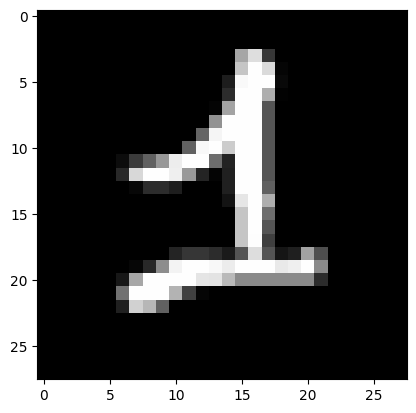

label:
 [[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [71]:
plt.imshow(tmp, cmap='gray', vmin=0, vmax=1)
plt.show()
print("label:\n",training_data[i][1])

**Zweite Aufgabe:** Schreibe eine kleine Funktion, die statt des Arrays, die entsprechende Ziffer zurückgibt.

In [53]:
def label(array):
    for i in range(10):
        if array[i]==1:
            return i

In [54]:
label(training_data[i][1])

9

## Erstellung eines Netzwerks, Training und Test
Ihr werdet gleich im Video sehen, was ein neuronales Netzwerk ist. Für den Moment ist es eine Black-Box, die 28x28=784 Grauwerte einliest und eine Zahl zwischen 0 und 9 wieder ausspuckt. Dafür benötigt das Netzwerk 784 Eingänge und 10 Ausgänge. Zusätzlich fügen wir noch 30 interne Gehirnzellen hinzu, die das Netzwerk komplexer und leistungsfähiger machen.

In [64]:
net = network.Network([784,30,10])
net.SGD(training_data, epochs = 3,mini_batch_size= 10,eta = 3.0, test_data=test_data)

Epoch 0 : 8161 / 10000
Epoch 1 : 8281 / 10000
Epoch 2 : 9239 / 10000


Wir testen einfach mal, wie gut das Netzwerk unsere Zahlen erkennen kann.

In [67]:
net.evaluate(validation_data)

9506

In [68]:
# Finde Falschklassifizierungen
for i in range(0,400):
    ergebnis = np.argmax(net.feedforward(training_data[i][0]))
    lbl  = label(training_data[i][1])
    if ergebnis!=lbl:
        print(i,ergebnis,lbl)

24 2 1
48 3 9
80 8 9
132 3 5
134 8 1
148 9 7
172 7 9
224 5 1
262 3 2
278 6 5
374 4 9


In [79]:
answer = net.feedforward(training_data[48][0])
print(answer)

[[3.26933318e-05]
 [5.53900644e-03]
 [1.00985452e-04]
 [9.77814724e-01]
 [1.22007808e-08]
 [2.32812910e-03]
 [1.88972218e-07]
 [3.68055429e-04]
 [2.93326711e-04]
 [7.51654668e-04]]


## Alternatives Netzwerk aus Video

In [66]:
# mit 2 hidden Layern mit jeweils 30 Neuronen schafft man fast 95 Prozent
# Anzahl der Parameter: 784x30+30+30x30+30+30x10 approx 25k

net = network.Network([784,30,30,10])
net.SGD(training_data, epochs = 10,mini_batch_size= 10,eta = 3.0, test_data=test_data)
net.evaluate(validation_data)

Epoch 0 : 9119 / 10000
Epoch 1 : 9277 / 10000
Epoch 2 : 9328 / 10000
Epoch 3 : 9418 / 10000
Epoch 4 : 9403 / 10000
Epoch 5 : 9445 / 10000
Epoch 6 : 9459 / 10000
Epoch 7 : 9468 / 10000
Epoch 8 : 9494 / 10000
Epoch 9 : 9497 / 10000


9506